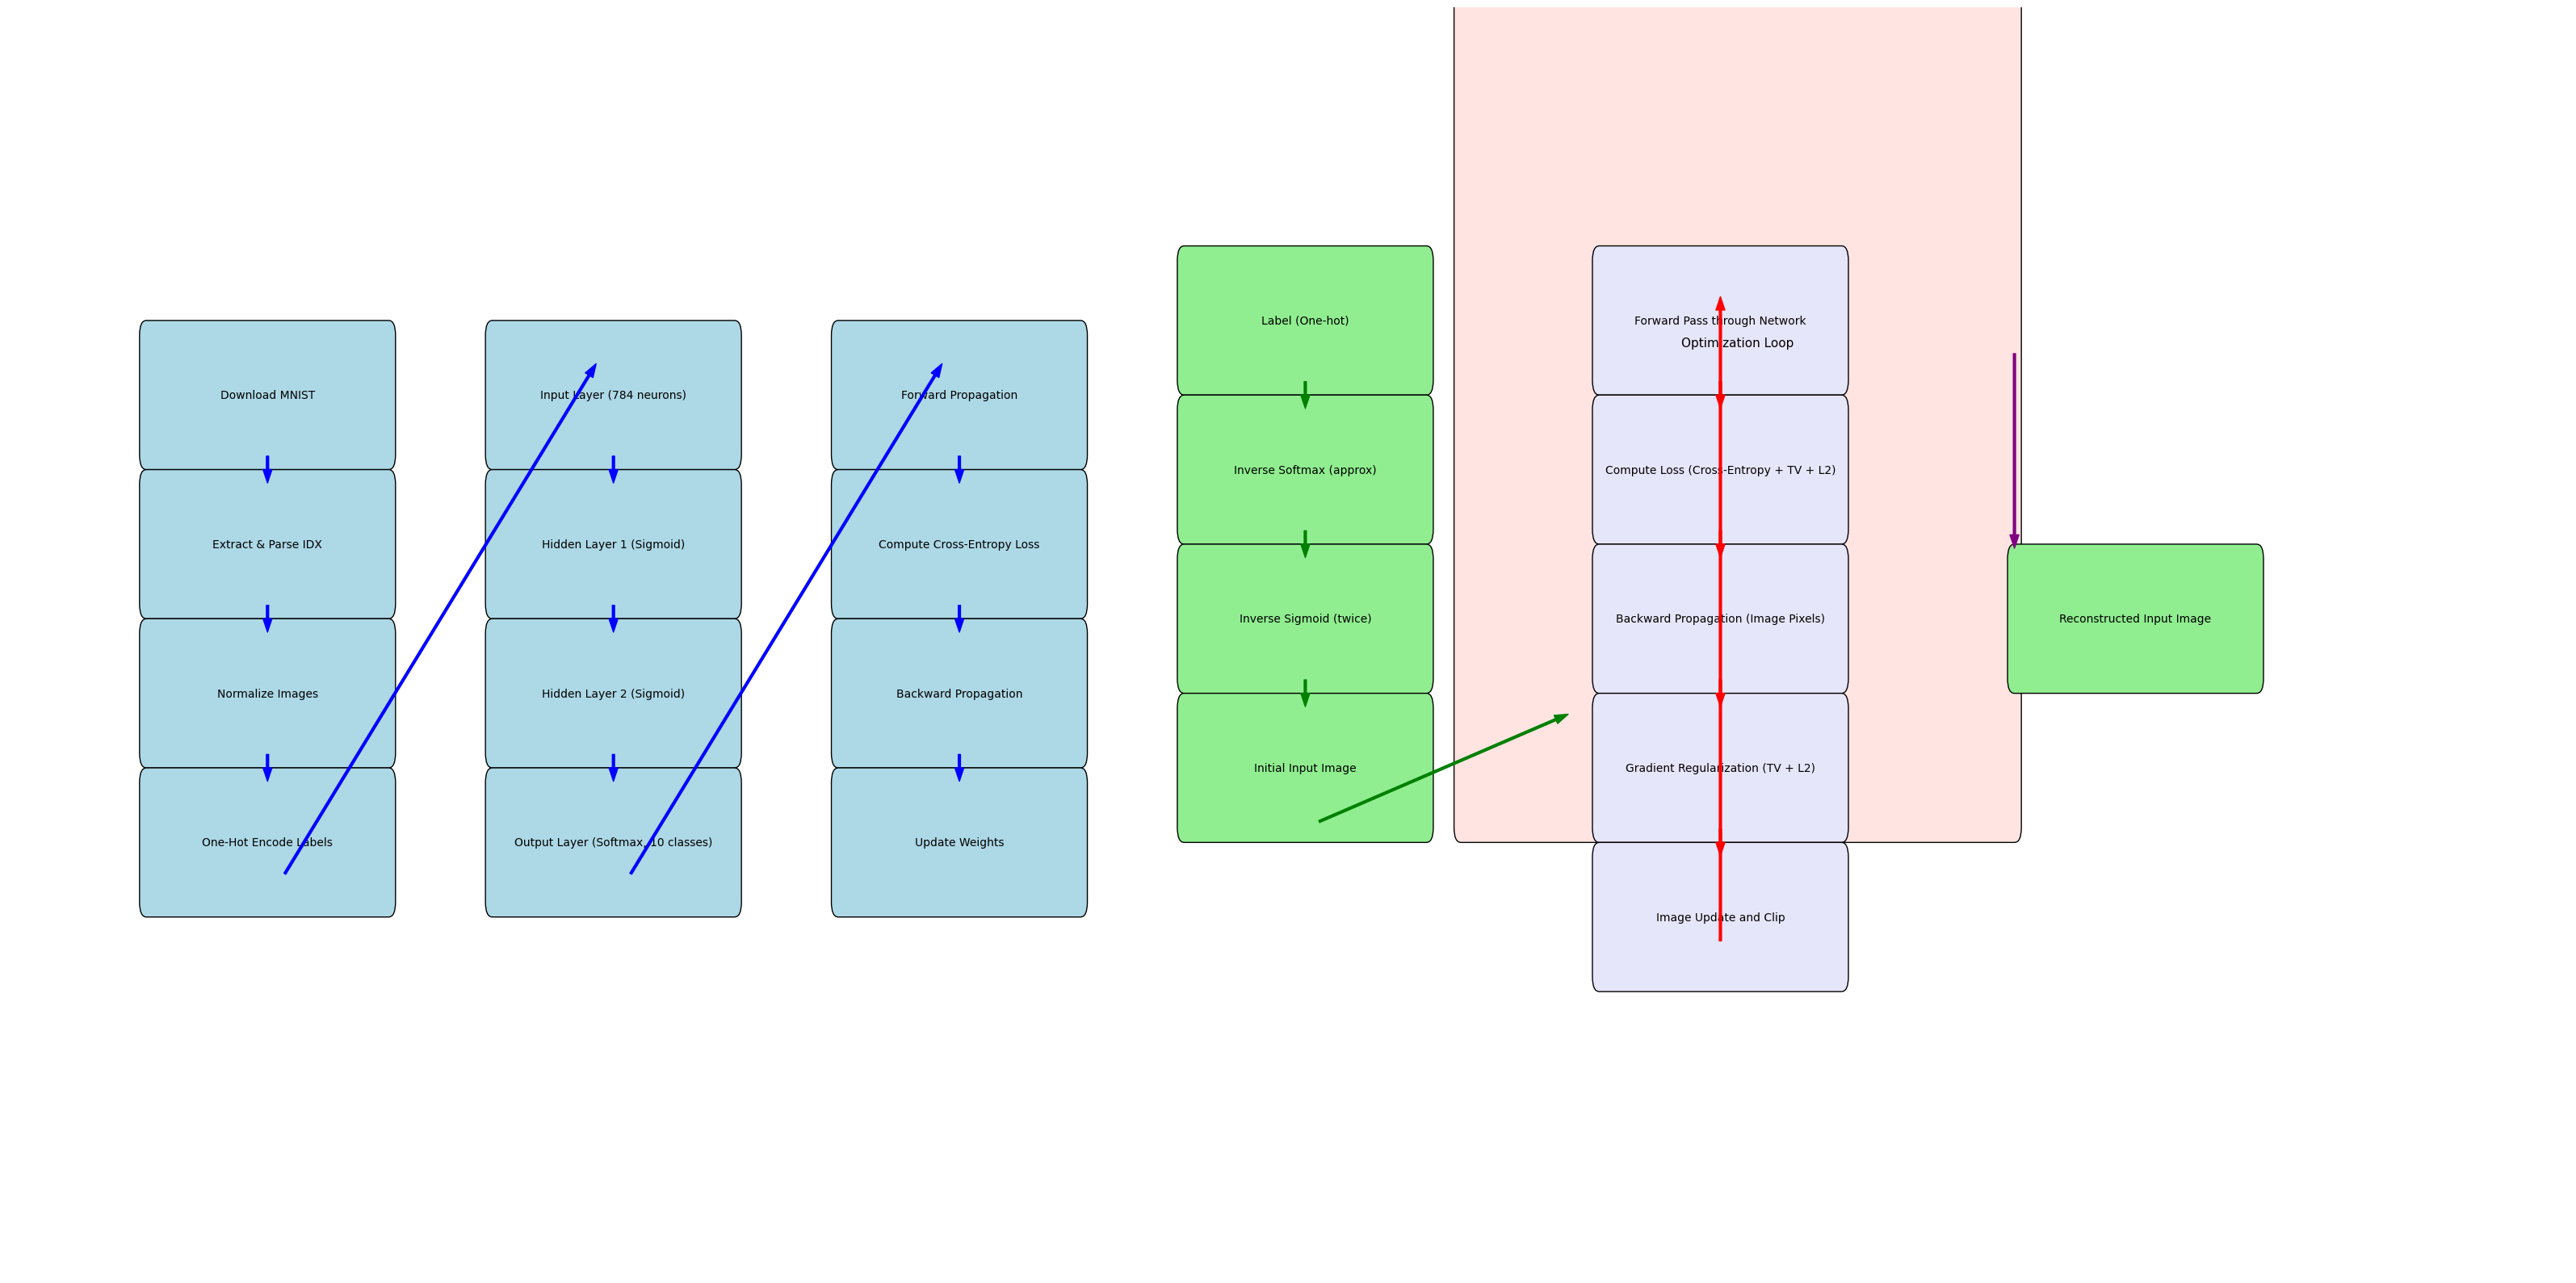

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(32, 16))  # Larger canvas
ax.axis('off')

# Helper function to draw blocks
def draw_block(x, y, text, color='lightblue', width=3.5, height=0.8, fontsize=10):
    ax.add_patch(patches.FancyBboxPatch((x, y), width, height,
                                        boxstyle="round,pad=0.1", edgecolor="black", facecolor=color))
    ax.text(x + width/2, y + height/2, text, ha='center', va='center', fontsize=fontsize, wrap=True)

# Helper function to draw arrows
def draw_arrow(start, end, color='blue'):
    ax.annotate('', xy=end, xytext=start,
                arrowprops=dict(facecolor=color, edgecolor=color, shrink=0.05, width=2, headwidth=8))

# Define blocks with coordinates
blocks = {
    'Download MNIST': (0, 9.5),
    'Extract & Parse IDX': (0, 8.5),
    'Normalize Images': (0, 7.5),
    'One-Hot Encode Labels': (0, 6.5),

    'Input Layer (784 neurons)': (5, 9.5),
    'Hidden Layer 1 (Sigmoid)': (5, 8.5),
    'Hidden Layer 2 (Sigmoid)': (5, 7.5),
    'Output Layer (Softmax, 10 classes)': (5, 6.5),

    'Forward Propagation': (10, 9.5),
    'Compute Cross-Entropy Loss': (10, 8.5),
    'Backward Propagation': (10, 7.5),
    'Update Weights': (10, 6.5),

    'Label (One-hot)': (15, 10),
    'Inverse Softmax (approx)': (15, 9),
    'Inverse Sigmoid (twice)': (15, 8),
    'Initial Input Image': (15, 7),

    'Optimization Loop': (19, 7),
    'Forward Pass through Network': (21, 10),
    'Compute Loss (Cross-Entropy + TV + L2)': (21, 9),
    'Backward Propagation (Image Pixels)': (21, 8),
    'Gradient Regularization (TV + L2)': (21, 7),
    'Image Update and Clip': (21, 6),

    'Reconstructed Input Image': (27, 8)
}

# Draw all blocks
for label, (x, y) in blocks.items():
    if label == 'Optimization Loop':
        draw_block(x, y, label, color='mistyrose', width=8, height=6.5, fontsize=11)
    elif label in [
        'Forward Pass through Network', 'Compute Loss (Cross-Entropy + TV + L2)',
        'Backward Propagation (Image Pixels)', 'Gradient Regularization (TV + L2)',
        'Image Update and Clip'
    ]:
        draw_block(x, y, label, color='lavender', fontsize=10)
    elif x >= 15:
        draw_block(x, y, label, color='lightgreen', fontsize=10)
    else:
        draw_block(x, y, label, fontsize=10)

# Draw arrows for training pipeline
forward_arrows = [
    ('Download MNIST', 'Extract & Parse IDX'),
    ('Extract & Parse IDX', 'Normalize Images'),
    ('Normalize Images', 'One-Hot Encode Labels'),
    ('One-Hot Encode Labels', 'Input Layer (784 neurons)'),
    ('Input Layer (784 neurons)', 'Hidden Layer 1 (Sigmoid)'),
    ('Hidden Layer 1 (Sigmoid)', 'Hidden Layer 2 (Sigmoid)'),
    ('Hidden Layer 2 (Sigmoid)', 'Output Layer (Softmax, 10 classes)'),
    ('Output Layer (Softmax, 10 classes)', 'Forward Propagation'),
    ('Forward Propagation', 'Compute Cross-Entropy Loss'),
    ('Compute Cross-Entropy Loss', 'Backward Propagation'),
    ('Backward Propagation', 'Update Weights')
]

for start, end in forward_arrows:
    start_pos = (blocks[start][0] + 1.75, blocks[start][1])
    end_pos = (blocks[end][0] + 1.75, blocks[end][1] + 0.8)
    draw_arrow(start_pos, end_pos, color='blue')

# Arrows for reverse inference
reverse_arrows = [
    ('Label (One-hot)', 'Inverse Softmax (approx)'),
    ('Inverse Softmax (approx)', 'Inverse Sigmoid (twice)'),
    ('Inverse Sigmoid (twice)', 'Initial Input Image'),
    ('Initial Input Image', 'Optimization Loop')
]

for start, end in reverse_arrows:
    start_pos = (blocks[start][0] + 1.75, blocks[start][1])
    end_pos = (blocks[end][0] + 1.75, blocks[end][1] + 0.8)
    draw_arrow(start_pos, end_pos, color='green')

# Arrows inside optimization loop
optimization_arrows = [
    ('Forward Pass through Network', 'Compute Loss (Cross-Entropy + TV + L2)'),
    ('Compute Loss (Cross-Entropy + TV + L2)', 'Backward Propagation (Image Pixels)'),
    ('Backward Propagation (Image Pixels)', 'Gradient Regularization (TV + L2)'),
    ('Gradient Regularization (TV + L2)', 'Image Update and Clip'),
    ('Image Update and Clip', 'Forward Pass through Network')
]

for start, end in optimization_arrows:
    start_pos = (blocks[start][0] + 1.75, blocks[start][1])
    end_pos = (blocks[end][0] + 1.75, blocks[end][1] + 0.8)
    draw_arrow(start_pos, end_pos, color='red')

# Final output arrow
draw_arrow((blocks['Optimization Loop'][0] + 8, blocks['Optimization Loop'][1] + 3.25),
           (blocks['Reconstructed Input Image'][0], blocks['Reconstructed Input Image'][1] + 0.8),
           color='purple')

# Set plot limits
ax.set_xlim(-2, 35)
ax.set_ylim(4, 12.5)

# Save and display
plt.tight_layout()
plt.savefig('mnist_reverse_nn_full_block_diagram.png', dpi=300)
plt.show()

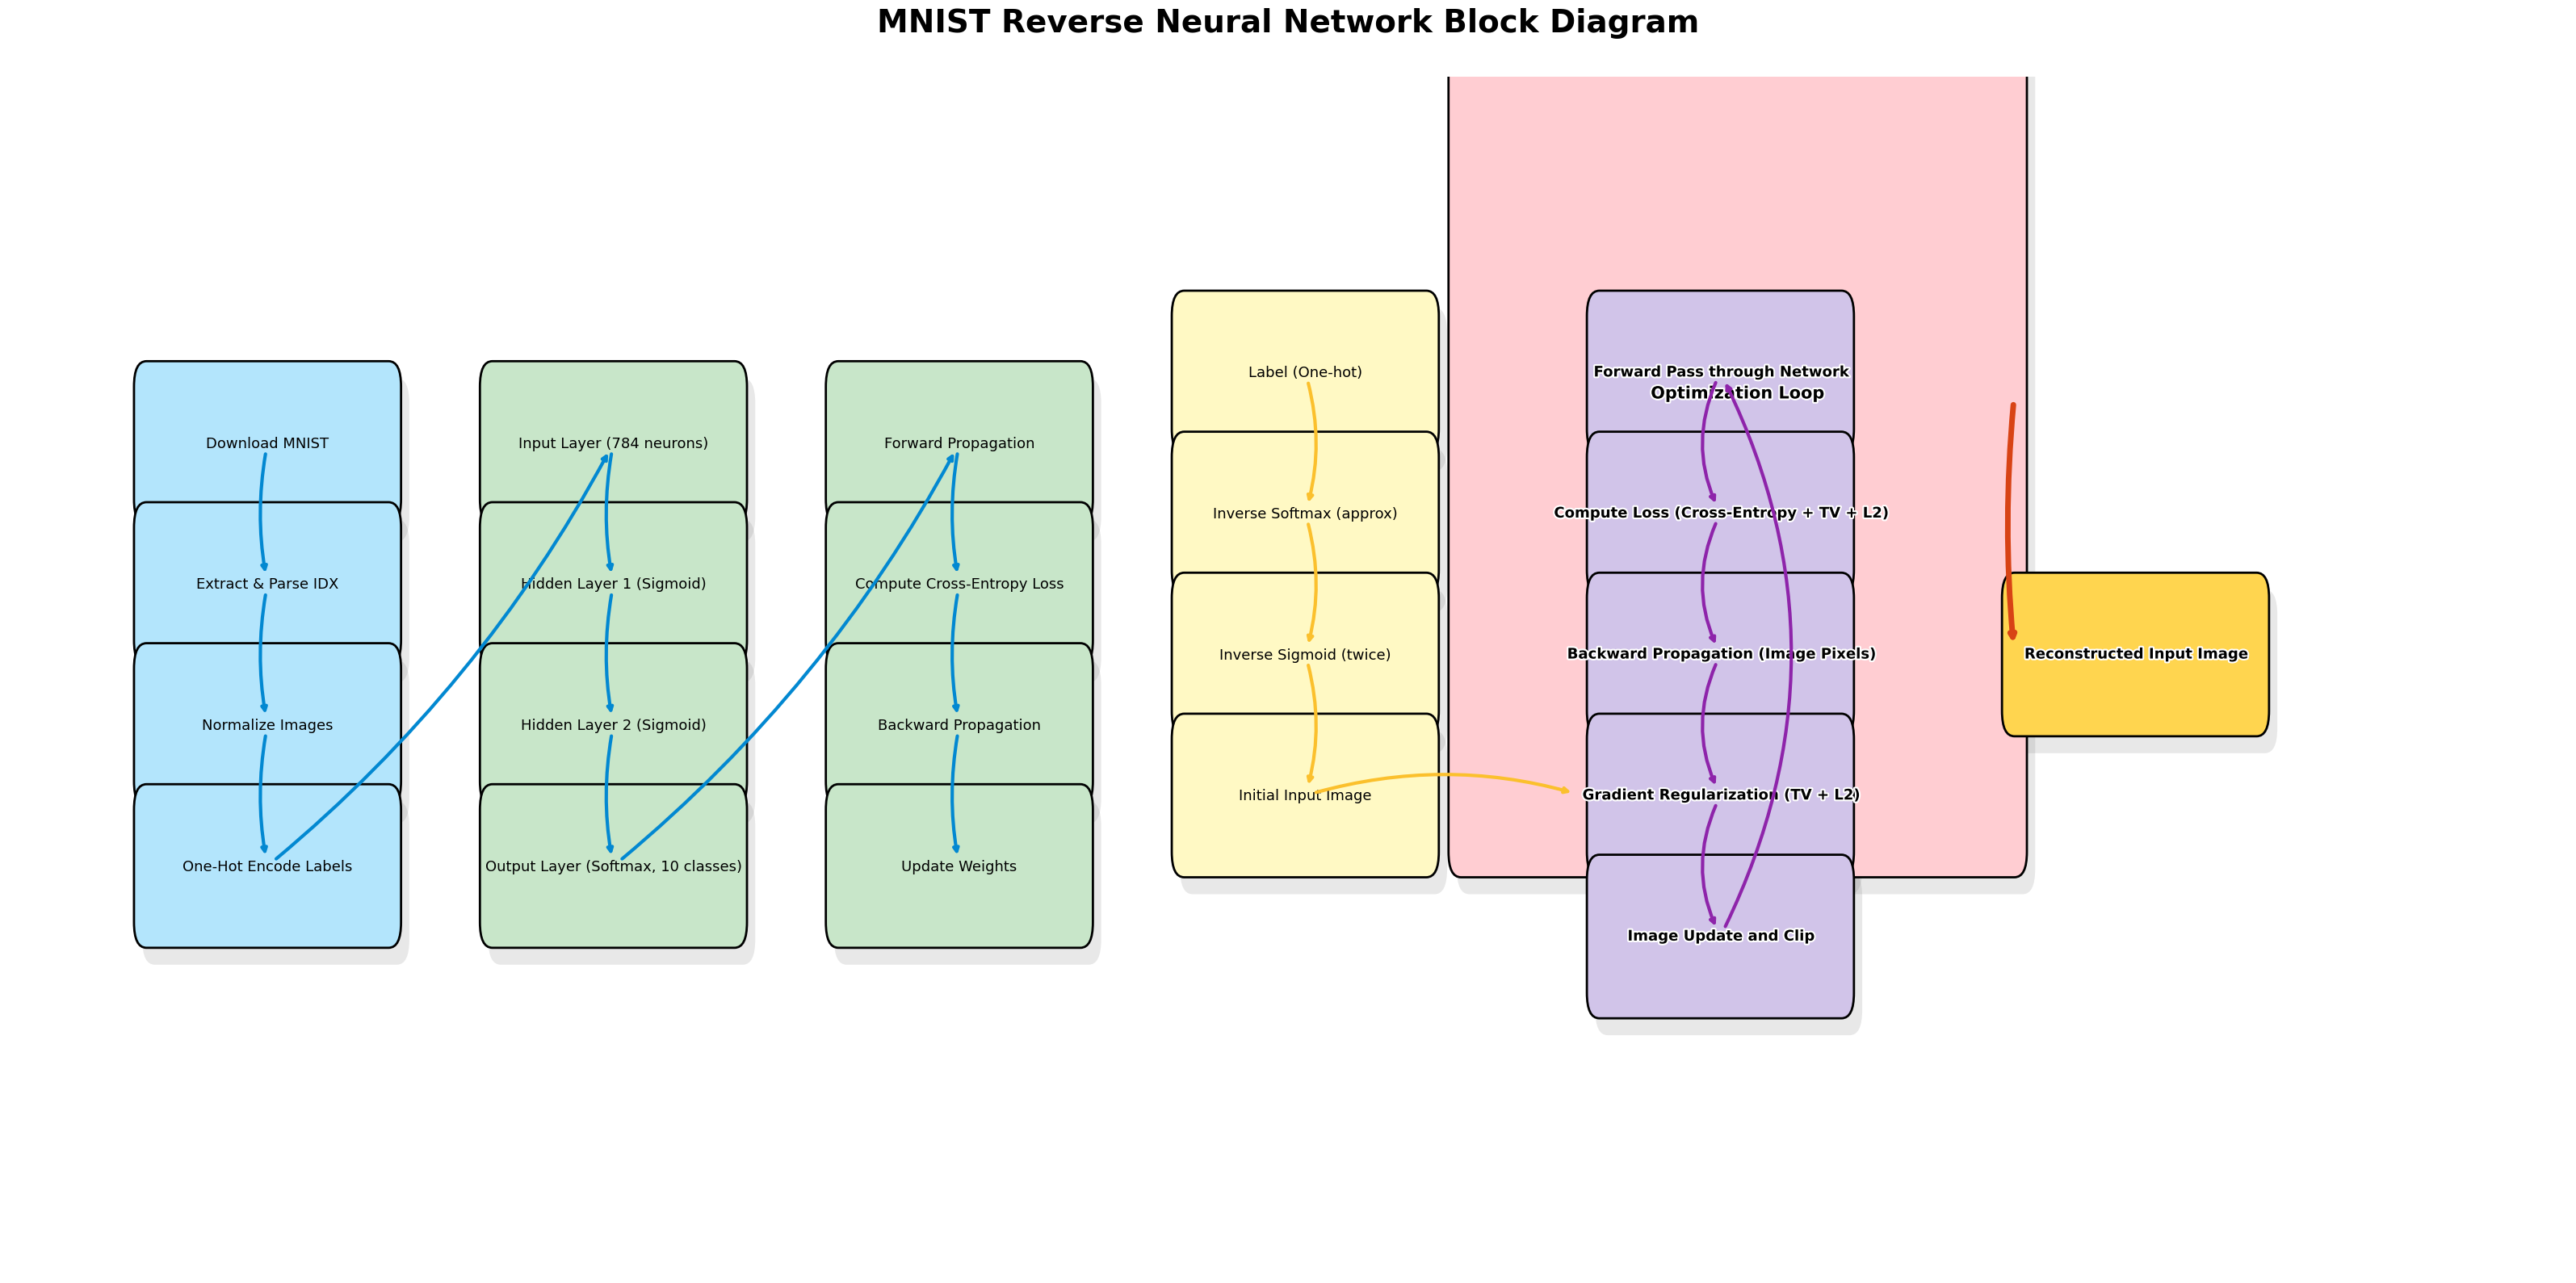

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patheffects import withStroke

# Create figure and axis
fig, ax = plt.subplots(figsize=(32, 16))
ax.axis('off')

# Helper function to draw blocks with shadow and style
def draw_block(x, y, text, color='lightblue', width=3.5, height=0.8, fontsize=12, bold=False, shadow=True):
    # Shadow
    if shadow:
        ax.add_patch(
            patches.FancyBboxPatch(
                (x+0.12, y-0.12), width, height,
                boxstyle="round,pad=0.18", edgecolor='none', facecolor='gray', alpha=0.18, zorder=1
            )
        )
    # Main block
    ax.add_patch(
        patches.FancyBboxPatch(
            (x, y), width, height,
            boxstyle="round,pad=0.18", edgecolor="black", linewidth=2, facecolor=color, zorder=2
        )
    )
    ax.text(
        x + width/2, y + height/2, text,
        ha='center', va='center',
        fontsize=fontsize,
        fontweight='bold' if bold else 'normal',
        wrap=True,
        zorder=3,
        path_effects=[withStroke(linewidth=3, foreground="white")] if bold else None
    )

# Helper function to draw curved arrows
def draw_arrow(start, end, color='blue', style='-|>', lw=3, curve=0.2):
    ax.annotate(
        '', xy=end, xytext=start,
        arrowprops=dict(
            arrowstyle=style,
            color=color,
            lw=lw,
            shrinkA=10, shrinkB=10,
            connectionstyle=f"arc3,rad={curve}"
        ),
        zorder=4
    )

# Define blocks with coordinates
blocks = {
    'Download MNIST': (0, 9.5),
    'Extract & Parse IDX': (0, 8.5),
    'Normalize Images': (0, 7.5),
    'One-Hot Encode Labels': (0, 6.5),

    'Input Layer (784 neurons)': (5, 9.5),
    'Hidden Layer 1 (Sigmoid)': (5, 8.5),
    'Hidden Layer 2 (Sigmoid)': (5, 7.5),
    'Output Layer (Softmax, 10 classes)': (5, 6.5),

    'Forward Propagation': (10, 9.5),
    'Compute Cross-Entropy Loss': (10, 8.5),
    'Backward Propagation': (10, 7.5),
    'Update Weights': (10, 6.5),

    'Label (One-hot)': (15, 10),
    'Inverse Softmax (approx)': (15, 9),
    'Inverse Sigmoid (twice)': (15, 8),
    'Initial Input Image': (15, 7),

    'Optimization Loop': (19, 7),
    'Forward Pass through Network': (21, 10),
    'Compute Loss (Cross-Entropy + TV + L2)': (21, 9),
    'Backward Propagation (Image Pixels)': (21, 8),
    'Gradient Regularization (TV + L2)': (21, 7),
    'Image Update and Clip': (21, 6),

    'Reconstructed Input Image': (27, 8)
}

# Block color mapping
block_colors = {
    'data': '#B3E5FC',
    'model': '#C8E6C9',
    'reverse': '#FFF9C4',
    'optimization': '#D1C4E9',
    'loop': '#FFCDD2',
    'output': '#FFD54F'
}

# Draw all blocks
for label, (x, y) in blocks.items():
    if label == 'Optimization Loop':
        draw_block(x, y, label, color=block_colors['loop'], width=8, height=6.5, fontsize=15, bold=True)
    elif label in [
        'Forward Pass through Network', 'Compute Loss (Cross-Entropy + TV + L2)',
        'Backward Propagation (Image Pixels)', 'Gradient Regularization (TV + L2)',
        'Image Update and Clip'
    ]:
        draw_block(x, y, label, color=block_colors['optimization'], fontsize=13, bold=True)
    elif label in [
        'Label (One-hot)', 'Inverse Softmax (approx)', 'Inverse Sigmoid (twice)', 'Initial Input Image'
    ]:
        draw_block(x, y, label, color=block_colors['reverse'], fontsize=13)
    elif label == 'Reconstructed Input Image':
        draw_block(x, y, label, color=block_colors['output'], fontsize=13, bold=True)
    elif x < 5:
        draw_block(x, y, label, color=block_colors['data'], fontsize=13)
    elif x < 15:
        draw_block(x, y, label, color=block_colors['model'], fontsize=13)
    else:
        draw_block(x, y, label, fontsize=13)

# Draw arrows for training pipeline
forward_arrows = [
    ('Download MNIST', 'Extract & Parse IDX'),
    ('Extract & Parse IDX', 'Normalize Images'),
    ('Normalize Images', 'One-Hot Encode Labels'),
    ('One-Hot Encode Labels', 'Input Layer (784 neurons)'),
    ('Input Layer (784 neurons)', 'Hidden Layer 1 (Sigmoid)'),
    ('Hidden Layer 1 (Sigmoid)', 'Hidden Layer 2 (Sigmoid)'),
    ('Hidden Layer 2 (Sigmoid)', 'Output Layer (Softmax, 10 classes)'),
    ('Output Layer (Softmax, 10 classes)', 'Forward Propagation'),
    ('Forward Propagation', 'Compute Cross-Entropy Loss'),
    ('Compute Cross-Entropy Loss', 'Backward Propagation'),
    ('Backward Propagation', 'Update Weights')
]
for start, end in forward_arrows:
    start_pos = (blocks[start][0] + 1.75, blocks[start][1] + 0.4)
    end_pos = (blocks[end][0] + 1.75, blocks[end][1] + 0.4)
    draw_arrow(start_pos, end_pos, color='#0288D1', curve=0.1)

# Arrows for reverse inference
reverse_arrows = [
    ('Label (One-hot)', 'Inverse Softmax (approx)'),
    ('Inverse Softmax (approx)', 'Inverse Sigmoid (twice)'),
    ('Inverse Sigmoid (twice)', 'Initial Input Image'),
    ('Initial Input Image', 'Optimization Loop')
]
for start, end in reverse_arrows:
    start_pos = (blocks[start][0] + 1.75, blocks[start][1] + 0.4)
    end_pos = (blocks[end][0] + 1.75, blocks[end][1] + 0.4)
    draw_arrow(start_pos, end_pos, color='#FBC02D', curve=-0.15)

# Arrows inside optimization loop
optimization_arrows = [
    ('Forward Pass through Network', 'Compute Loss (Cross-Entropy + TV + L2)'),
    ('Compute Loss (Cross-Entropy + TV + L2)', 'Backward Propagation (Image Pixels)'),
    ('Backward Propagation (Image Pixels)', 'Gradient Regularization (TV + L2)'),
    ('Gradient Regularization (TV + L2)', 'Image Update and Clip'),
    ('Image Update and Clip', 'Forward Pass through Network')
]
for start, end in optimization_arrows:
    start_pos = (blocks[start][0] + 1.75, blocks[start][1] + 0.4)
    end_pos = (blocks[end][0] + 1.75, blocks[end][1] + 0.4)
    draw_arrow(start_pos, end_pos, color='#8E24AA', curve=0.25)

# Final output arrow
draw_arrow(
    (blocks['Optimization Loop'][0] + 8, blocks['Optimization Loop'][1] + 3.25),
    (blocks['Reconstructed Input Image'][0], blocks['Reconstructed Input Image'][1] + 0.4),
    color='#D84315', lw=5, curve=0.05
)

# Add title
plt.title("MNIST Reverse Neural Network Block Diagram", fontsize=28, fontweight='bold', pad=40)

# Set plot limits and background
ax.set_xlim(-2, 35)
ax.set_ylim(4, 12.5)
ax.set_facecolor('#FAFAFA')
plt.tight_layout()
plt.savefig('mnist_reverse_nn_full_block_diagram.png', dpi=300)
plt.show()

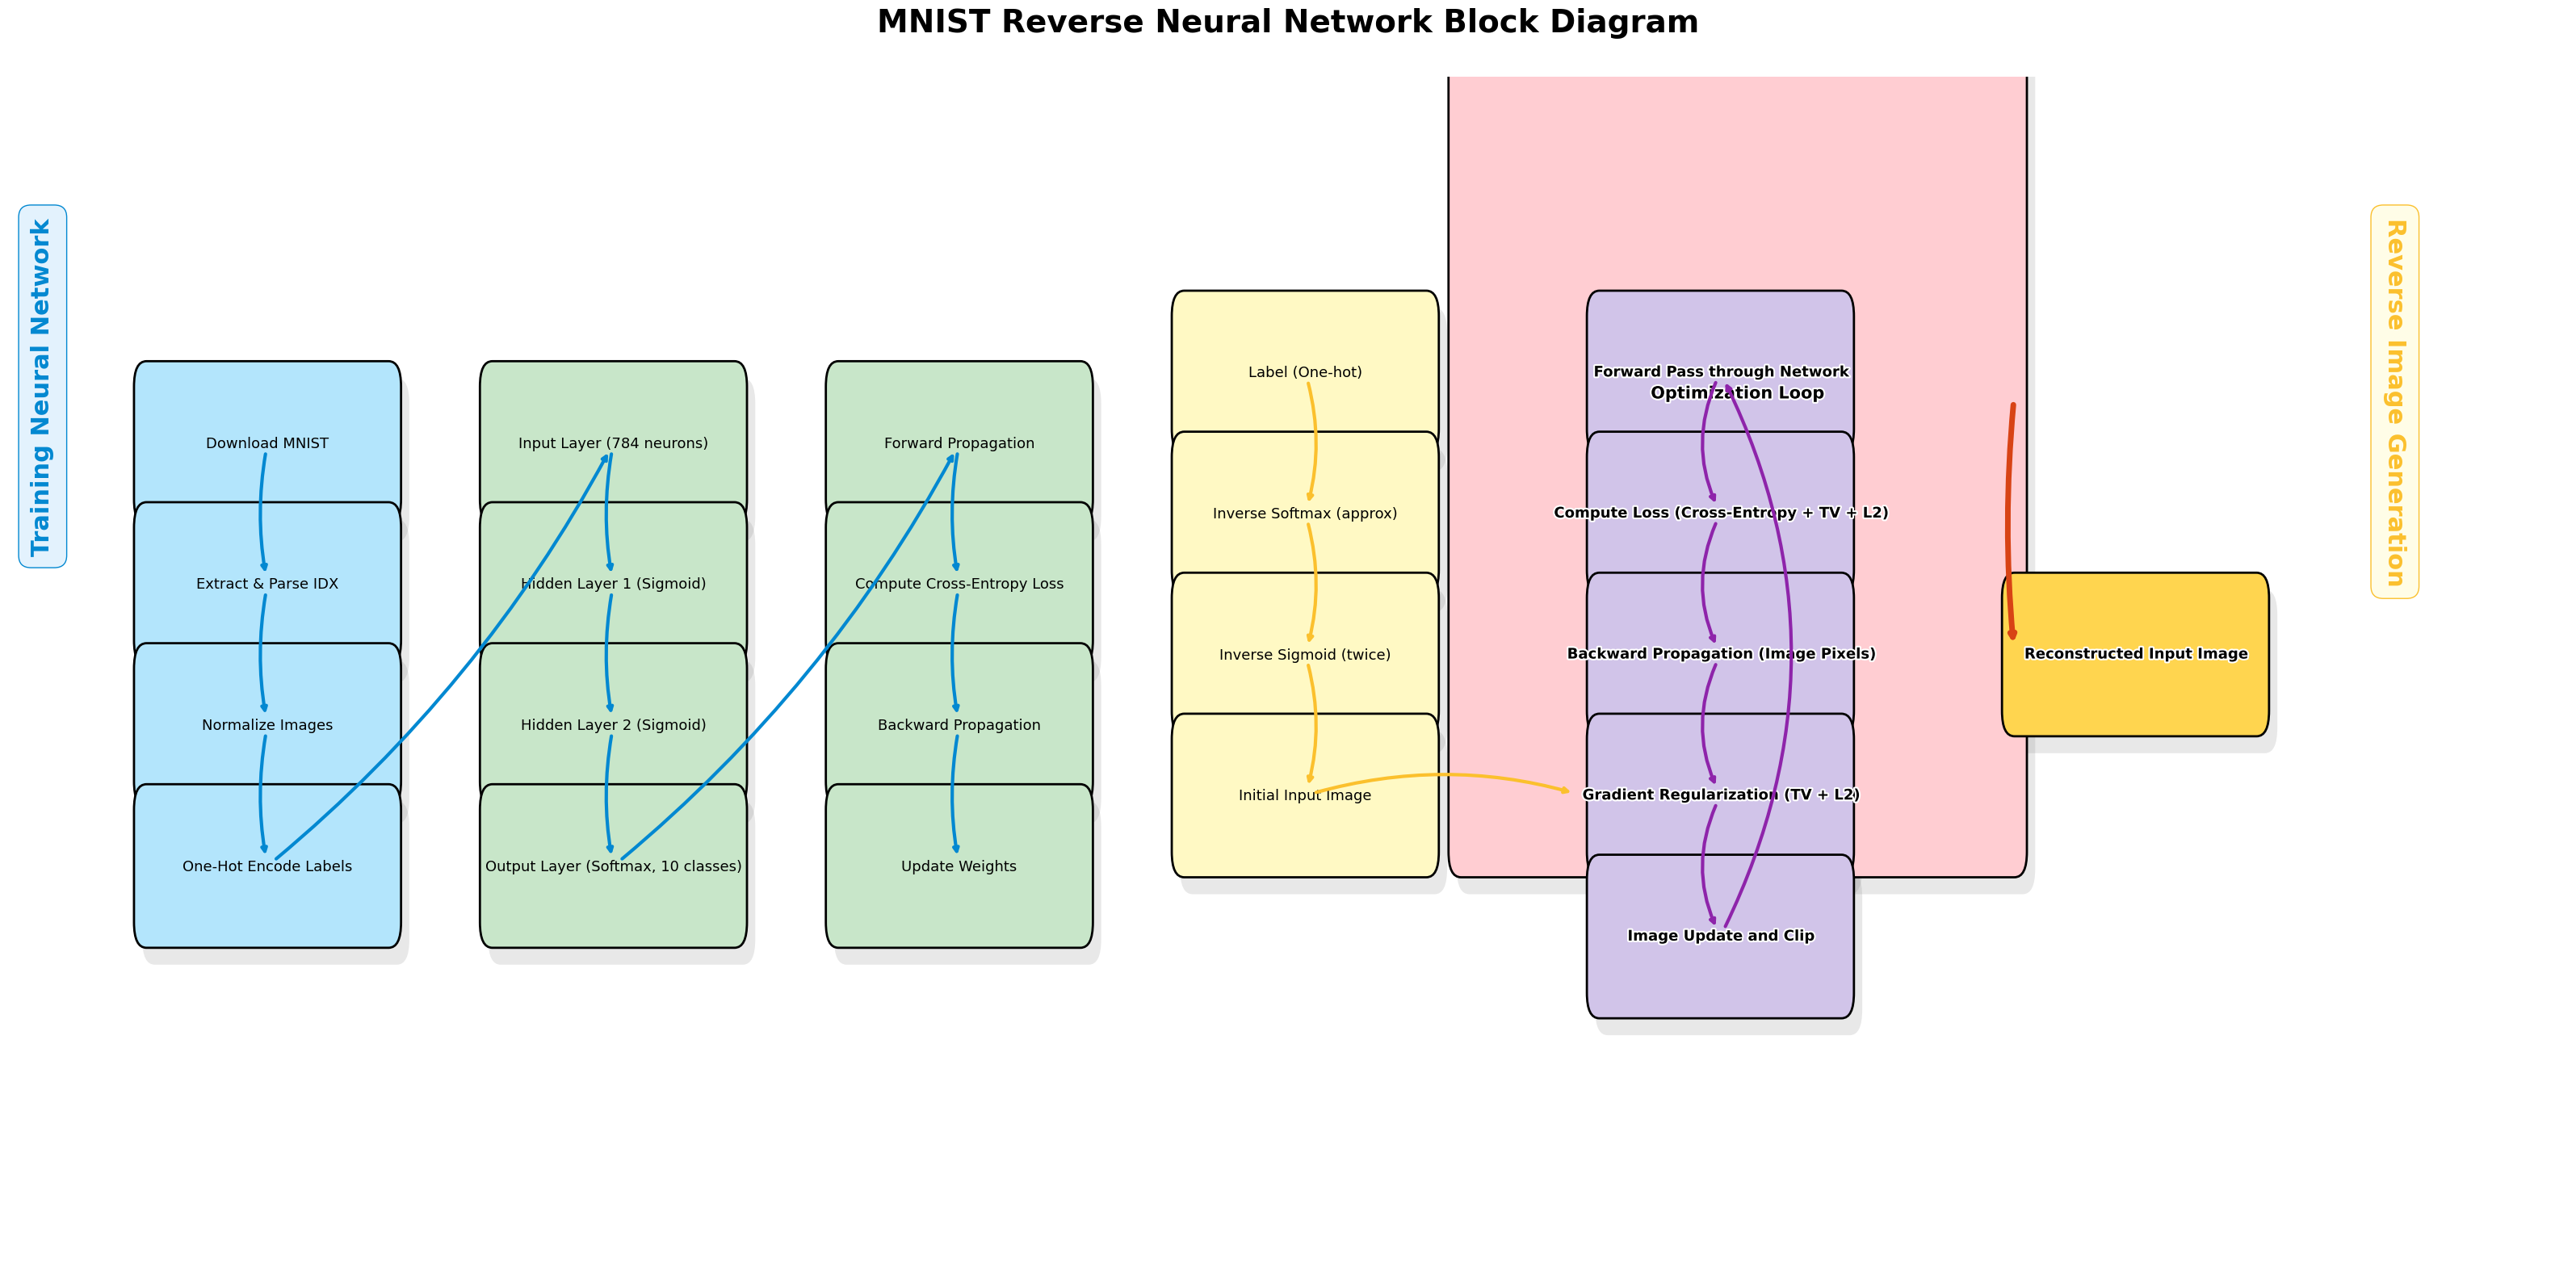

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patheffects import withStroke

# Create figure and axis
fig, ax = plt.subplots(figsize=(32, 16))
ax.axis('off')

# Helper function to draw blocks with shadow and style
def draw_block(x, y, text, color='lightblue', width=3.5, height=0.8, fontsize=12, bold=False, shadow=True):
    # Shadow
    if shadow:
        ax.add_patch(
            patches.FancyBboxPatch(
                (x+0.12, y-0.12), width, height,
                boxstyle="round,pad=0.18", edgecolor='none', facecolor='gray', alpha=0.18, zorder=1
            )
        )
    # Main block
    ax.add_patch(
        patches.FancyBboxPatch(
            (x, y), width, height,
            boxstyle="round,pad=0.18", edgecolor="black", linewidth=2, facecolor=color, zorder=2
        )
    )
    ax.text(
        x + width/2, y + height/2, text,
        ha='center', va='center',
        fontsize=fontsize,
        fontweight='bold' if bold else 'normal',
        wrap=True,
        zorder=3,
        path_effects=[withStroke(linewidth=3, foreground="white")] if bold else None
    )

# Helper function to draw curved arrows
def draw_arrow(start, end, color='blue', style='-|>', lw=3, curve=0.2):
    ax.annotate(
        '', xy=end, xytext=start,
        arrowprops=dict(
            arrowstyle=style,
            color=color,
            lw=lw,
            shrinkA=10, shrinkB=10,
            connectionstyle=f"arc3,rad={curve}"
        ),
        zorder=4
    )

# Define blocks with coordinates
blocks = {
    'Download MNIST': (0, 9.5),
    'Extract & Parse IDX': (0, 8.5),
    'Normalize Images': (0, 7.5),
    'One-Hot Encode Labels': (0, 6.5),

    'Input Layer (784 neurons)': (5, 9.5),
    'Hidden Layer 1 (Sigmoid)': (5, 8.5),
    'Hidden Layer 2 (Sigmoid)': (5, 7.5),
    'Output Layer (Softmax, 10 classes)': (5, 6.5),

    'Forward Propagation': (10, 9.5),
    'Compute Cross-Entropy Loss': (10, 8.5),
    'Backward Propagation': (10, 7.5),
    'Update Weights': (10, 6.5),

    'Label (One-hot)': (15, 10),
    'Inverse Softmax (approx)': (15, 9),
    'Inverse Sigmoid (twice)': (15, 8),
    'Initial Input Image': (15, 7),

    'Optimization Loop': (19, 7),
    'Forward Pass through Network': (21, 10),
    'Compute Loss (Cross-Entropy + TV + L2)': (21, 9),
    'Backward Propagation (Image Pixels)': (21, 8),
    'Gradient Regularization (TV + L2)': (21, 7),
    'Image Update and Clip': (21, 6),

    'Reconstructed Input Image': (27, 8)
}

# Block color mapping
block_colors = {
    'data': '#B3E5FC',
    'model': '#C8E6C9',
    'reverse': '#FFF9C4',
    'optimization': '#D1C4E9',
    'loop': '#FFCDD2',
    'output': '#FFD54F'
}

# Draw all blocks
for label, (x, y) in blocks.items():
    if label == 'Optimization Loop':
        draw_block(x, y, label, color=block_colors['loop'], width=8, height=6.5, fontsize=15, bold=True)
    elif label in [
        'Forward Pass through Network', 'Compute Loss (Cross-Entropy + TV + L2)',
        'Backward Propagation (Image Pixels)', 'Gradient Regularization (TV + L2)',
        'Image Update and Clip'
    ]:
        draw_block(x, y, label, color=block_colors['optimization'], fontsize=13, bold=True)
    elif label in [
        'Label (One-hot)', 'Inverse Softmax (approx)', 'Inverse Sigmoid (twice)', 'Initial Input Image'
    ]:
        draw_block(x, y, label, color=block_colors['reverse'], fontsize=13)
    elif label == 'Reconstructed Input Image':
        draw_block(x, y, label, color=block_colors['output'], fontsize=13, bold=True)
    elif x < 5:
        draw_block(x, y, label, color=block_colors['data'], fontsize=13)
    elif x < 15:
        draw_block(x, y, label, color=block_colors['model'], fontsize=13)
    else:
        draw_block(x, y, label, fontsize=13)

# Draw arrows for training pipeline
forward_arrows = [
    ('Download MNIST', 'Extract & Parse IDX'),
    ('Extract & Parse IDX', 'Normalize Images'),
    ('Normalize Images', 'One-Hot Encode Labels'),
    ('One-Hot Encode Labels', 'Input Layer (784 neurons)'),
    ('Input Layer (784 neurons)', 'Hidden Layer 1 (Sigmoid)'),
    ('Hidden Layer 1 (Sigmoid)', 'Hidden Layer 2 (Sigmoid)'),
    ('Hidden Layer 2 (Sigmoid)', 'Output Layer (Softmax, 10 classes)'),
    ('Output Layer (Softmax, 10 classes)', 'Forward Propagation'),
    ('Forward Propagation', 'Compute Cross-Entropy Loss'),
    ('Compute Cross-Entropy Loss', 'Backward Propagation'),
    ('Backward Propagation', 'Update Weights')
]
for start, end in forward_arrows:
    start_pos = (blocks[start][0] + 1.75, blocks[start][1] + 0.4)
    end_pos = (blocks[end][0] + 1.75, blocks[end][1] + 0.4)
    draw_arrow(start_pos, end_pos, color='#0288D1', curve=0.1)

# Arrows for reverse inference
reverse_arrows = [
    ('Label (One-hot)', 'Inverse Softmax (approx)'),
    ('Inverse Softmax (approx)', 'Inverse Sigmoid (twice)'),
    ('Inverse Sigmoid (twice)', 'Initial Input Image'),
    ('Initial Input Image', 'Optimization Loop')
]
for start, end in reverse_arrows:
    start_pos = (blocks[start][0] + 1.75, blocks[start][1] + 0.4)
    end_pos = (blocks[end][0] + 1.75, blocks[end][1] + 0.4)
    draw_arrow(start_pos, end_pos, color='#FBC02D', curve=-0.15)

# Arrows inside optimization loop
optimization_arrows = [
    ('Forward Pass through Network', 'Compute Loss (Cross-Entropy + TV + L2)'),
    ('Compute Loss (Cross-Entropy + TV + L2)', 'Backward Propagation (Image Pixels)'),
    ('Backward Propagation (Image Pixels)', 'Gradient Regularization (TV + L2)'),
    ('Gradient Regularization (TV + L2)', 'Image Update and Clip'),
    ('Image Update and Clip', 'Forward Pass through Network')
]
for start, end in optimization_arrows:
    start_pos = (blocks[start][0] + 1.75, blocks[start][1] + 0.4)
    end_pos = (blocks[end][0] + 1.75, blocks[end][1] + 0.4)
    draw_arrow(start_pos, end_pos, color='#8E24AA', curve=0.25)

# Final output arrow
draw_arrow(
    (blocks['Optimization Loop'][0] + 8, blocks['Optimization Loop'][1] + 3.25),
    (blocks['Reconstructed Input Image'][0], blocks['Reconstructed Input Image'][1] + 0.4),
    color='#D84315', lw=5, curve=0.05
)

# Add left and right labels
ax.text(-1.5, 11.5, "Training Neural Network", fontsize=22, fontweight='bold', color='#0288D1', rotation=90, va='top', ha='center', bbox=dict(facecolor='#E3F2FD', edgecolor='#0288D1', boxstyle='round,pad=0.5'))
ax.text(32.5, 11.5, "Reverse Image Generation", fontsize=22, fontweight='bold', color='#FBC02D', rotation=270, va='top', ha='center', bbox=dict(facecolor='#FFFDE7', edgecolor='#FBC02D', boxstyle='round,pad=0.5'))

# Add title
plt.title("MNIST Reverse Neural Network Block Diagram", fontsize=28, fontweight='bold', pad=40)

# Set plot limits and background
ax.set_xlim(-2, 35)
ax.set_ylim(4, 12.5)
ax.set_facecolor('#FAFAFA')
plt.tight_layout()
plt.savefig('mnist_reverse_nn_full_block_diagram.png', dpi=300)
plt.show()

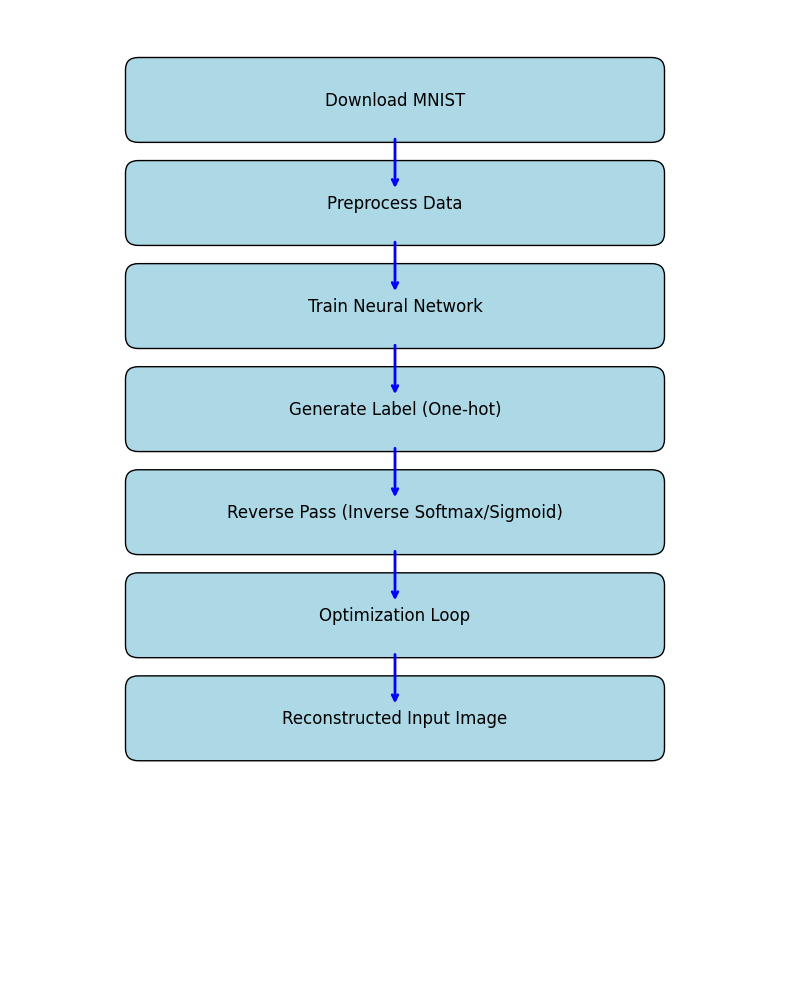

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(8, 10))
ax.axis('off')

blocks = [
    "Download MNIST",
    "Preprocess Data",
    "Train Neural Network",
    "Generate Label (One-hot)",
    "Reverse Pass (Inverse Softmax/Sigmoid)",
    "Optimization Loop",
    "Reconstructed Input Image"
]

y = 12
for block in blocks:
    ax.add_patch(patches.FancyBboxPatch((2, y), 8, 1, boxstyle="round,pad=0.2", edgecolor="black", facecolor="lightblue"))
    ax.text(6, y+0.5, block, ha='center', va='center', fontsize=12)
    y -= 1.7

for i in range(len(blocks)-1):
    ax.annotate('', xy=(6, 12-1.7*i-1), xytext=(6, 12-1.7*i-0.1),
                arrowprops=dict(arrowstyle='->', color='blue', lw=2))

ax.set_xlim(0, 12)
ax.set_ylim(-2, 14)
plt.tight_layout()
plt.show()